<a href="https://colab.research.google.com/github/fahmidjobbi/TP-COLLAB/blob/main/TP_R%C3%A9duction_des_dimensions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

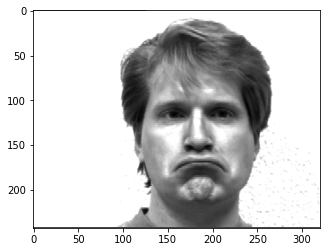

In [5]:
from PIL import Image 
import numpy as np
from sklearn import svm 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


 #Partîe 1 
img=Image.open('/content/subject01.sad' )
 
import matplotlib.pyplot as plt
plt.imshow(img, 'gray')

In [6]:
img1=np.array(img)
img2=img1.flatten()
img22=img1.reshape(img1.shape[0]*img1.shape[1])
img22=img1.reshape(243*320)

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Mounted at /content/drive
 9E8B8E6F-FEEC-46C2-BC61-20595994D2AC.jpeg
 book
'bzy-pkjt-obs (2021-12-13 at 00:29 GMT-8)'
 challangeee.mp4
 chimie
'Colab Notebooks'
'Contact Information.gform'
'Copy of Methodes_et_Exercices_de_Mathematiques_PCSI-PTSI.pdf'
'CTF .gform'
'djo cv.pdf'
'Getting started.pdf'
 kolkol.mp4
'LAYAN FILM.mp4'
 RSVP.gform
'Untitled Site.gsite'
 untitled.wav
 WIN_20220207_14_19_30_Pro.mp4


In [7]:
import glob 
path=glob.glob('/content/drive/MyDrive/yalefaces/*')
liste=[]
for i in path :
  image1=Image.open(i)
  im1=np.array(image1)
  im2=img1.reshape(img1.shape[0]*img1.shape[1])
  liste.append(im2)

In [9]:
data=np.array(liste)
data.shape

(165, 77760)

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=165)
C=pca.fit_transform(data)
C.shape

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


(165, 165)

In [22]:
import os
def get_data_set(filepath):
  imgs = []
  labels = []
  print('Start reading files ... ')
  for f in os.listdir(filepath):
    if not (f.endswith('pgm')):
      labels.append(f.split('.')[0])
      print('Reading file: ' + f)
      img = np.asarray(Image.open(filepath+f))
      img2=img.flatten()
      imgs.append(img2)
      
  print('Reading files finihsed ')
  return np.asarray(imgs), labels




In [24]:
data,label=get_data_set('/content/drive/MyDrive/yalefaces/')

Start reading files ... 
Reading file: subject03.sad
Reading file: subject03.rightlight
Reading file: subject03.normal
Reading file: subject03.noglasses
Reading file: subject03.leftlight
Reading file: subject03.happy
Reading file: subject03.glasses
Reading file: subject03.centerlight
Reading file: subject02.wink
Reading file: subject02.surprised
Reading file: subject02.sleepy
Reading file: subject02.sad
Reading file: subject02.rightlight
Reading file: subject02.normal
Reading file: subject02.noglasses
Reading file: subject02.leftlight
Reading file: subject02.happy
Reading file: subject02.glasses
Reading file: subject02.centerlight
Reading file: subject01.wink
Reading file: subject01.surprised
Reading file: subject01.sleepy
Reading file: subject01.sad
Reading file: subject01.rightlight
Reading file: subject01.normal
Reading file: subject01.noglasses
Reading file: subject01.leftlight
Reading file: subject01.happy
Reading file: subject01.glasses
Reading file: subject01.centerlight
Reading

In [25]:
data.shape

(165, 77760)

In [40]:
from sklearn import svm
from sklearn.model_selection import train_test_split
x_train,x_test,train_label,test_label=train_test_split(data,label, test_size=0.33, random_state=1)
model=svm.SVC(kernel='linear', C=1)
model.fit(x_train,train_label)
pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
ACE=accuracy_score(test_label, pred)*100
print(ACE)

92.72727272727272
